In [197]:
def impurity_calc(Yes,No):
    return (1-pow((Yes/(Yes+No)),2)-pow((No/(Yes+No)),2))

def impurity_calc_and_weighted_mean(Yes1,No1,Yes2,No2):
    tot1=Yes1+No1
    tot2=Yes2+No2
    impurity1=1-pow((Yes1/(tot1)),2)-pow((No1/(tot1)),2)
    impurity2=1-pow((Yes2/(tot2)),2)-pow((No2/(tot2)),2)
    weighted_mean=((tot1)/(tot1+tot2))*impurity1+(tot2/(tot1+tot2))*impurity2

    print("impurity1")
    print(impurity1)
    print("impurity2")
    print(impurity2)
    print("weighted_mean")
    print(weighted_mean)

chest pain

In [198]:
impurity_calc_and_weighted_mean(105,39,34,125)


impurity1
0.3949652777777779
impurity2
0.33622087733871275
weighted_mean
0.36413900824044665


good blood circulation

In [199]:
impurity_calc_and_weighted_mean(37,127,100,33)


impurity1
0.3494199881023201
impurity2
0.373113234213353
weighted_mean
0.3600300949466547


blocked arteries

In [200]:
impurity_calc_and_weighted_mean(92,31,45,129)


impurity1
0.3770242580474586
impurity2
0.38347205707491083
weighted_mean
0.38080175646758213


In [201]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import polars as pl

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

df=pl.from_pandas(df)
df

sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
f64,f64,f64,f64,f64
5.1,3.5,1.4,0.2,0.0
4.9,3.0,1.4,0.2,0.0
4.7,3.2,1.3,0.2,0.0
4.6,3.1,1.5,0.2,0.0
5.0,3.6,1.4,0.2,0.0
…,…,…,…,…
6.7,3.0,5.2,2.3,2.0
6.3,2.5,5.0,1.9,2.0
6.5,3.0,5.2,2.0,2.0


In [202]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_p=pd.get_dummies(df['target'])
df_p
df=df.drop('target',axis=1)
df=df.join(df_p)
df.columns

Index(['sepal length (cm)',  'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)',                 0.0,                 1.0,
                       2.0],
      dtype='object')

In [203]:
from sklearn.model_selection import train_test_split
X=df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y=df[[                 0.0,                 1.0,
                       2.0]]

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=69)

In [204]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [205]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.9736842105263158


In [206]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter to fine tune
param_grid = {
    'max_depth': range(1, 4, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}
# Decision tree classifier
tree = DecisionTreeClassifier(random_state=1)
# GridSearchCV                        
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
   cv=5, verbose=True)
grid_search.fit(X_train, y_train)

# Best score and estimator
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


best accuracy 0.9553359683794467
DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)


In [207]:
print(grid_search.best_estimator_.score(X_train,y_train))
print(grid_search.best_estimator_.score(X_test,y_test))

0.9642857142857143
0.9473684210526315


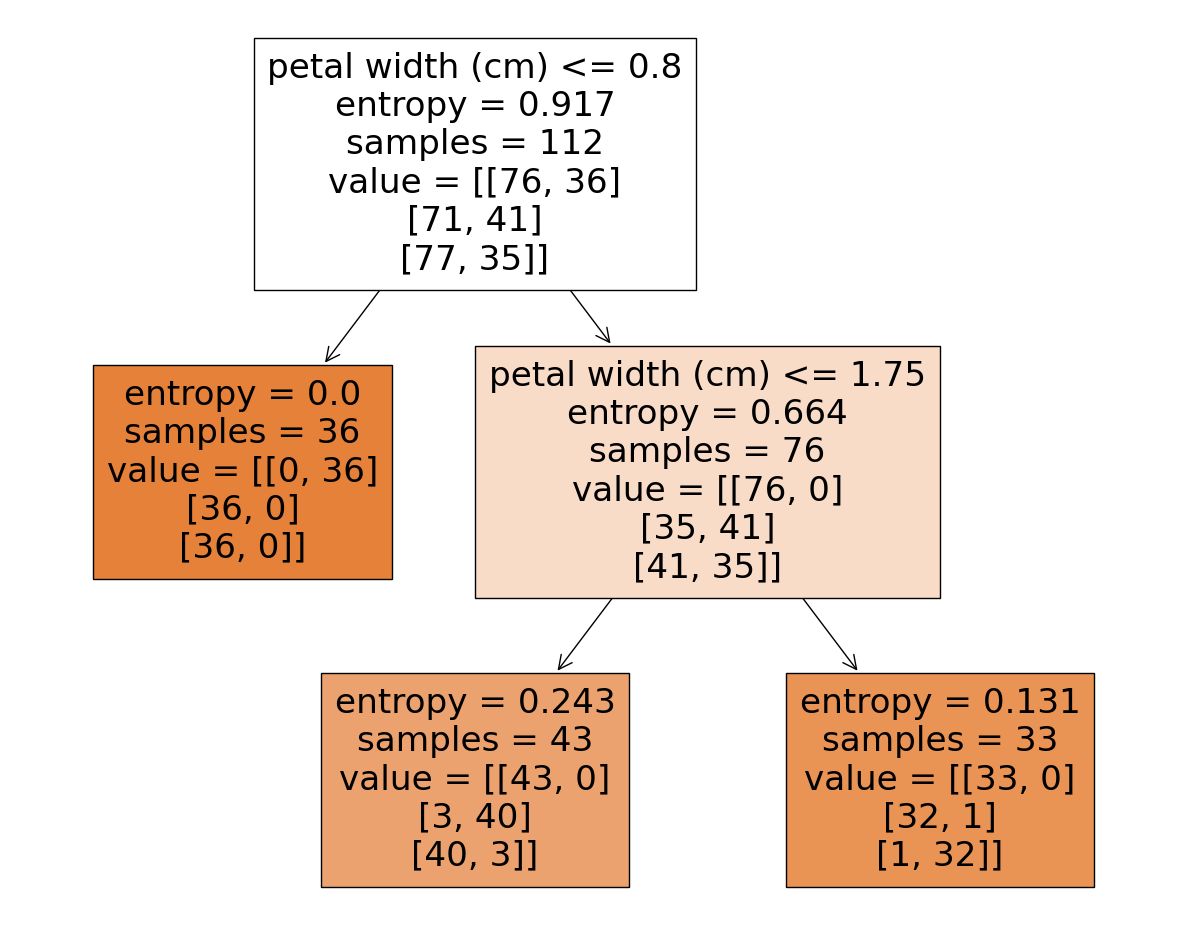

In [208]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# best estimator 
tree_clf = grid_search.best_estimator_
# plot 
plt.figure(figsize=(15, 12))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names,
          class_names=iris.target_names)
plt.show()

In [209]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# see how model confusion matrix varies with threshold
bestmodel = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       random_state=1)


#labels = y_test.sort_values().drop_duplicates().to_list()
labels = ['0','1','2']

def make_confusion_matrix(model, threshold=0.5):
    y_pred = (bestmodel.predict_proba(X_test)[:, 1] >= threshold)
    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = [6,6])
    sns.heatmap(conf, cmap='Blues', annot=True, square=True, cbar=False,
           xticklabels=labels,
           yticklabels=labels,fmt='.3g');
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.show()

In [210]:
make_confusion_matrix(bestmodel.fit(X_train,y_train),threshold=0.5)

TypeError: list indices must be integers or slices, not tuple

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc= OneHotEncoder()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [ ]:
df_p=pd.get_dummies(df['target'])
df_p
df=df.drop('target',axis=1)
df=df.join(df_p)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0.0,1.0,2.0
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True
